# Student Performance Indicator 

## Life cycle of Data science Project
 

1) Defining the problem and setting goals 
 

   2) Collecting data from various sources

3) Preparing the data by cleaning, transforming, and integrating it

4) Exploratory Data Analysis (EDA)

5) Data modeling

6) Presenting and automating the results. 

# Project statement 

This project understands how the student's performance (test scores) is affected by other variables such as Gender,Ethnicity,
Parental level of education, Luch and Test preparation course

#  Data Collection

Data source -https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

The data consists of 8 columns and 1000 rows

# 2.1 Import Data and Required Packages

In [ ]:
#basic imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

: 

In [2]:
data=pd.read_csv(r"D:\Downloads\StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

# 2.2 Dataset Information

gender:sex of students->(Male/female)

race/ethnicity: ethnicity of students->(Group A,B,C,D,E)

parental level of education:parents highest education qualification(bachelor's degree, some college, master's degree,
       associate's degree, high school, some high school)

lunch: having lunch before test(standard, free/reduced)

test preparation course: course completed or not complete before test

math score

reading score

writing score

In [5]:
print(data['gender'].unique())
print(data['race/ethnicity'].unique())
print(data['parental level of education'].unique())
print(data['lunch'].unique())
print(data['test preparation course'].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


## 3 Data Checks to Perform

Check Missing Values

Check Duplicates

Check Data types

Check the number of unique values of each column

Check Statistics of Dataset

Check various categorical present in the different categorical column

In [6]:
#checking for missing values
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in dataset

In [7]:
#changing  the column names of dataset
data.columns=['Gender','race_ethnicity','parental_level_of_education','Lunch','test_preparation_course',
             'math_score','reading_score','writing_score' ]

In [8]:
#checking for duplicates
data.duplicated().sum()

0

There are no duplicate values in the dataset

In [9]:
#checking for information about the dataset columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   Lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have total 7 columns:

3 Numeric columns:[math_score,reading_score,writing_score]

4 Categorical columns:[Gender,race_ethnicity,parental_level_of_education,Lunch,test_preparation_course]

In [10]:
#nunique function is used to count the number of unique values in dataset
data.nunique(axis=0)

Gender                          2
race_ethnicity                  5
parental_level_of_education     6
Lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights

1. From above description of numerical data, all means are very close to each other 66 to 69

2. All standard deviations are close between 14.6 and 15.19

3. There is a minimum score 0 for maths,for writing it  is higher =10 and for reading is much higer=17

In [12]:
data.head()

,Gender,race_ethnicity,parental_level_of_education,Lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
#checking for different categories in categooricarical features
print("categories in Gender:",data['Gender'].unique())
print("categories in race_ethnicity",data['race_ethnicity'].unique())
print("categories in parental_level_of_education",data['parental_level_of_education'].unique())
print("categories in Lunch:",data['Lunch'].unique())
print('categories in test_preparation_course:',data['test_preparation_course'].unique())

categories in Gender: ['female' 'male']
categories in race_ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental_level_of_education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in Lunch: ['standard' 'free/reduced']
categories in test_preparation_course: ['none' 'completed']


In [14]:
# defining numerical and categorical columns
numerical_features=[feature for feature in data.columns if data[feature].dtype !='O']
categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']

In [15]:
print('numerical featurea are:',numerical_features)
print('categorical features are:',categorical_features)

numerical featurea are: ['math_score', 'reading_score', 'writing_score']
categorical features are: ['Gender', 'race_ethnicity', 'parental_level_of_education', 'Lunch', 'test_preparation_course']


In [16]:
# creating columns to dataset 
data['Total_score']=data['math_score']+data['reading_score']+data['writing_score']
data['Average']=data['Total_score']/3

In [17]:
data.head(2)

,Gender,race_ethnicity,parental_level_of_education,Lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [18]:
maths_full=(data['math_score']==100).sum()
reading_full=(data['reading_score']==100).sum()
writing_full=(data['writing_score']==100).sum()
print(f'number of students with full marks in maths: {maths_full}')
print(f'number of students with full marks in reading: {reading_full}')
print(f'number of students with full marks in writing: {writing_full}')

number of students with full marks in maths: 7
number of students with full marks in reading: 17
number of students with full marks in writing: 14


In [19]:
maths_less_20=(data['math_score']<=20).sum()
reading_less_20=(data['reading_score']<=20).sum()
writing_less_20=(data['writing_score']<=20).sum()
print(f'number of students with lessthan 20 marks in maths: {maths_less_20}')
print(f'number of students with lessthan 20 marks in reading: {reading_less_20}')
print(f'number of students with lessthan 20 marks in writing: {writing_less_20}')

number of students with lessthan 20 marks in maths: 4
number of students with lessthan 20 marks in reading: 1
number of students with lessthan 20 marks in writing: 3


From above values we get students have performed wrost in maths

Students performed Best in reading

In [20]:
categorical_features

['Gender',
 'race_ethnicity',
 'parental_level_of_education',
 'Lunch',
 'test_preparation_course']

In [21]:
data.groupby('parental_level_of_education').count()

,Gender,race_ethnicity,Lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
parental_level_of_education,,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179,179


we have completed data preprocessing  3 rd step of Data Science process

## 4) Exploratory Data Anlysis(EDA)

### Histogram

### Kernal Distribution Function(KDE)

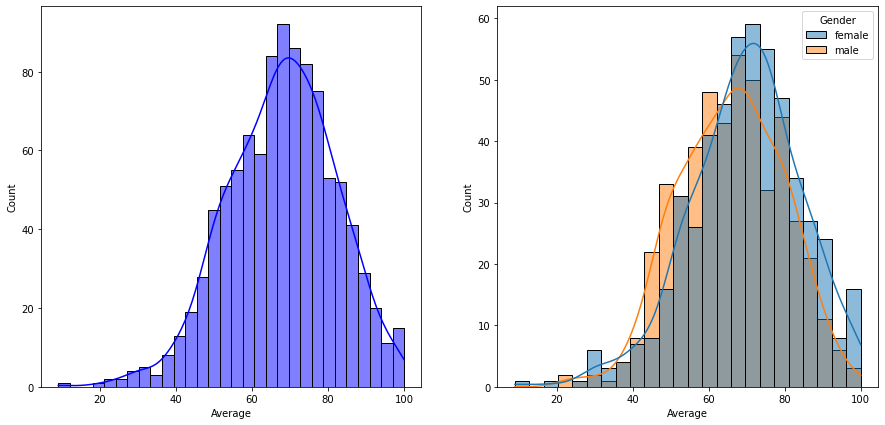

In [22]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=data,x='Average',kde=True,hue='Gender')
plt.show()

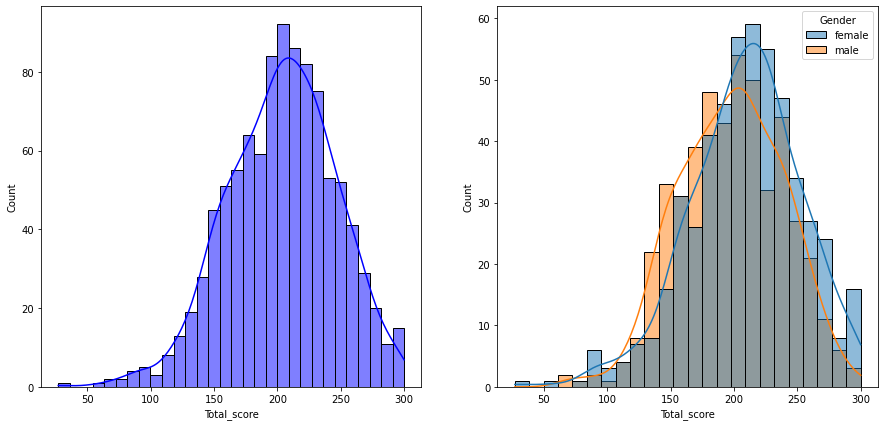

In [23]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Total_score',bins=30,kde=True,color='blue')
plt.subplot(122)
sns.histplot(data=data,x='Total_score',kde=True,hue='Gender')
plt.show()

In [24]:
#insight 
#Female students tends to perform well then male students.

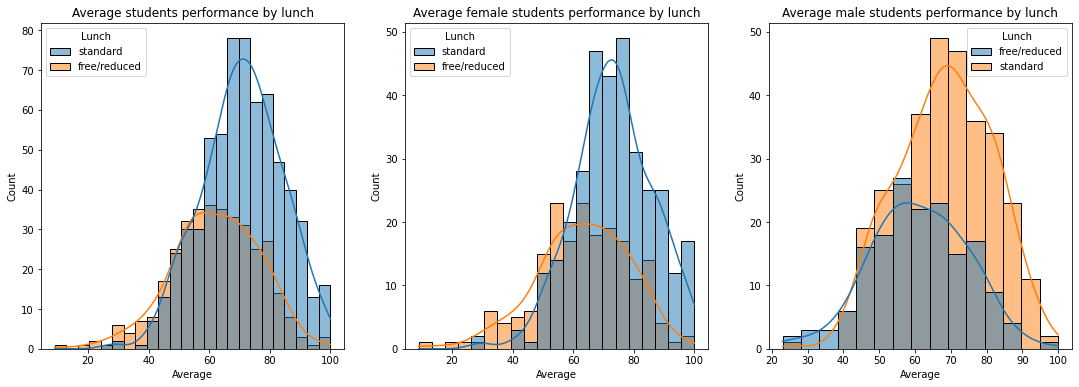

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='Lunch')
plt.title('Average students performance by lunch')
plt.subplot(142)
sns.histplot(data=data[data.Gender=='female'],x='Average',kde=True,hue='Lunch')
plt.title('Average female students performance by lunch')
plt.subplot(143)
sns.histplot(data=data[data.Gender=='male'],x='Average',kde=True,hue='Lunch')
plt.title('Average male students performance by lunch')
plt.show()

In [26]:
#insight 
# After lunch students performence more in both female and male

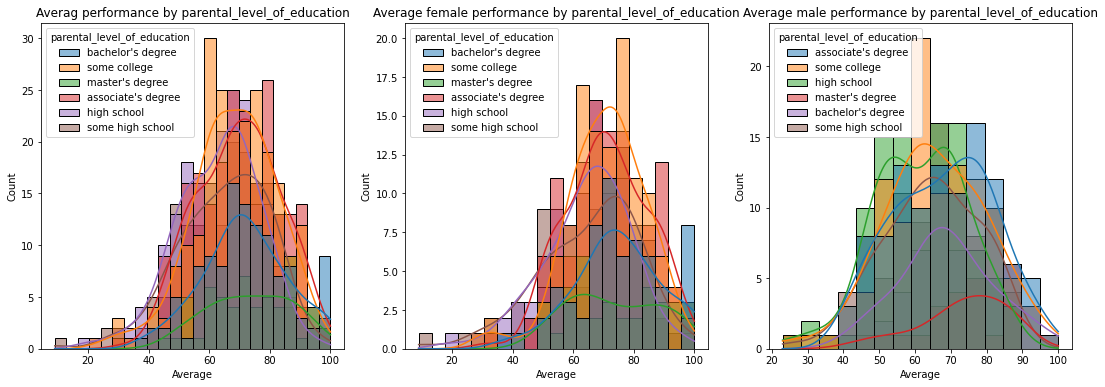

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='parental_level_of_education')
plt.title('Averag performance by parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.Gender=='female'],x='Average',kde=True,hue='parental_level_of_education')
plt.title('Average female performance by parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.Gender=='male'],x='Average',kde=True,hue='parental_level_of_education')
plt.title('Average male performance by parental_level_of_education')
plt.show()

In [28]:
# insight 
#In female students whose parents have "masters degree,bachelor's degree,associate's degree"tend to performed weel
# In male students whose parents have "masters degree" tend to performce well
#over all insight: Students whose parents have "masters degree" tend performing well

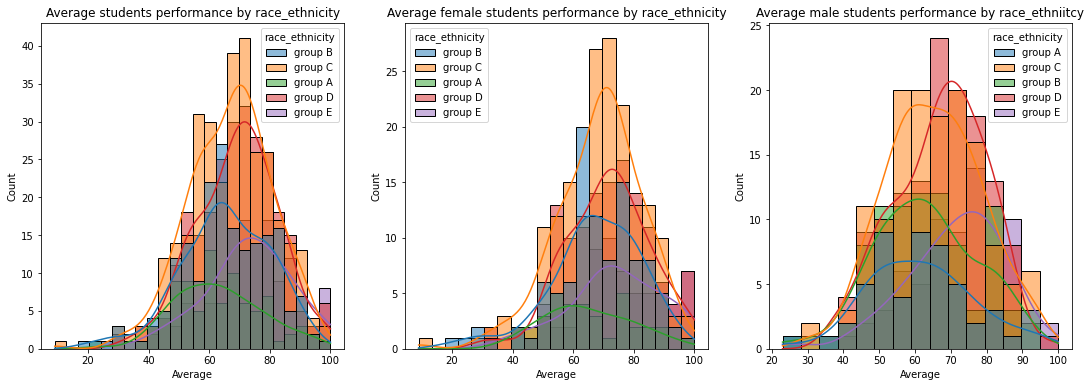

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data,x='Average',kde=True,hue='race_ethnicity')
plt.title('Average students performance by race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.Gender=='female'],x='Average',kde=True,hue='race_ethnicity')
plt.title('Average female students performance by race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.Gender=='male'],x='Average',kde=True,hue='race_ethnicity')
plt.title('Average male students performance by race_ethniitcy')
plt.show()

In [30]:
# insights
# Students from groupA,B,E perform poorly in exams
#Stuents from groupA,B,E perform poorly in exams irrespective of their Gender

# Maximum score of students in all subjects

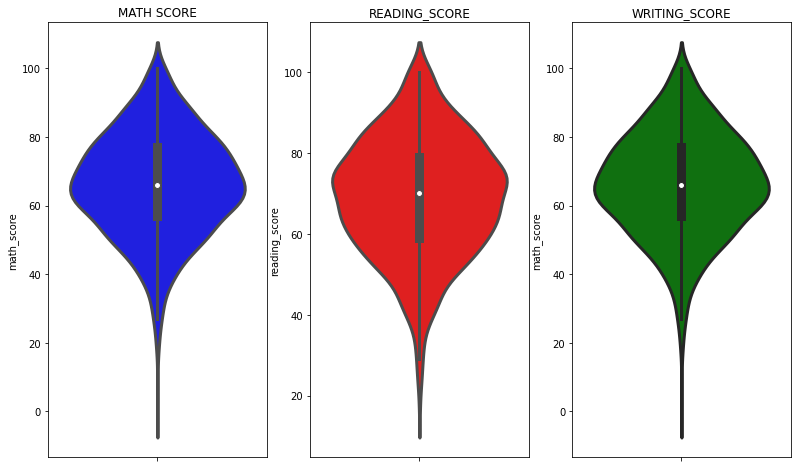

In [31]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=data,color='blue',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING_SCORE')
sns.violinplot(y='reading_score',data=data,color='red',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING_SCORE')
sns.violinplot(y='math_score',data=data,color='green',linewidth=3)
plt.show()

In [32]:
# insight 
# In maths and writing more students got marks between 60-80
# In reading more students gor marks between 50-90

##  Multivariate analysis using pieplot

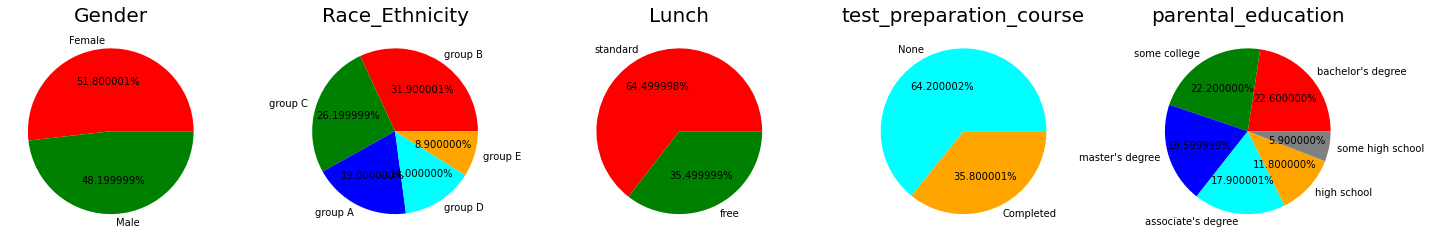

In [33]:
plt.rcParams['figure.figsize']=(20,8)
plt.subplot(1,5,1)
size=data['Gender'].value_counts()
labels='Female','Male'
color=['red','green']

plt.pie(size, colors=color, labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = data['race_ethnicity'].value_counts()
labels = ['group B', 'group C', 'group A', 'group D', 'group E']
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Race_Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = data['Lunch'].value_counts()
labels = ['standard','free']
color = ['red', 'green']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = data['test_preparation_course'].value_counts()
labels = ['None','Completed']
color = ['cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('test_preparation_course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = data['parental_level_of_education'].value_counts()
labels = ["bachelor's degree",'some college',"master's degree","associate's degree",'high school','some high school']
color = ['red', 'green', 'blue', 'cyan', 'orange','grey']

plt.pie(size, colors=color, labels=labels, autopct='%2f%%')
plt.title('parental_education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()

In [34]:
#insight
# male and female students are almost equal 
#  number of Students are more in groupB 
# number of students are more  having  standard lunch
# number of students are more not completed test_preparation_course
# number of students are more whose parental education is some college and bachlors degree

In [35]:
gender_groupby=data.groupby('Gender').mean()
gender_groupby

,math_score,reading_score,writing_score,Total_score,Average
Gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [36]:
gender_groupby=data.groupby('Gender').median()
gender_groupby

,math_score,reading_score,writing_score,Total_score,Average
Gender,,,,,
female,65.0,73.0,74.0,211.0,70.333333
male,69.0,66.0,64.0,199.0,66.333333


In [37]:
plt.figure(figsize=(10,8))
female_score=[]

<Figure size 720x576 with 0 Axes>

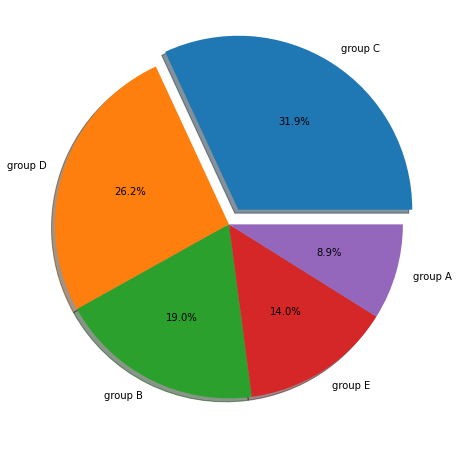

In [38]:
plt.pie(x = data['race_ethnicity'].value_counts(),labels=data['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

In [39]:
#insight 
# most of the students belonging from groupC/groupD
#least number of students belongs to groupA

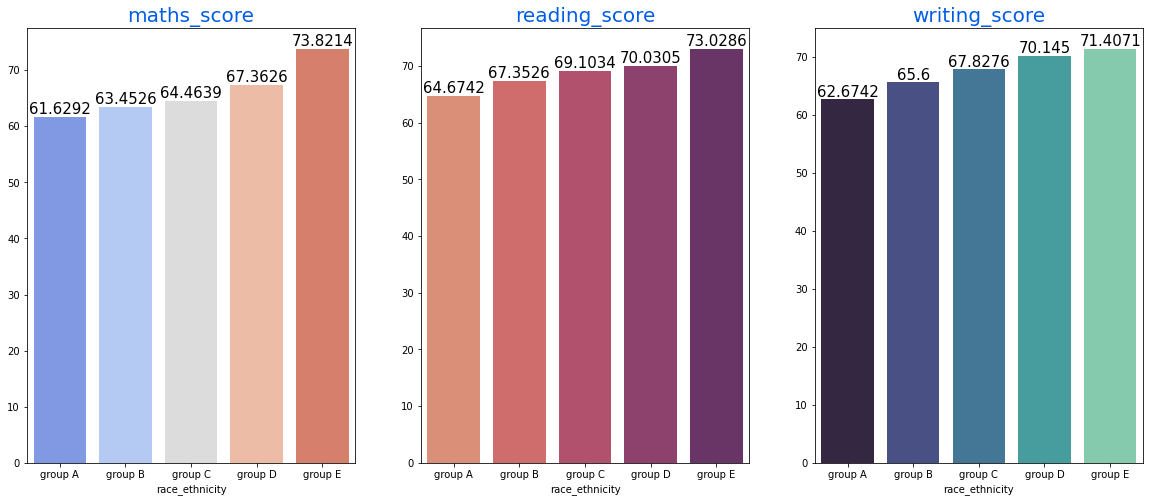

In [40]:
Group_data=data.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data['math_score'].mean().index,y=Group_data['math_score'].mean().values,palette='coolwarm',ax=ax[0])
ax[0].set_title('maths_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['reading_score'].mean().index,y=Group_data['reading_score'].mean().values,palette='flare',ax=ax[1])
ax[1].set_title('reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data['writing_score'].mean().index,y=Group_data['writing_score'].mean().values,palette='mako',ax=ax[2])
ax[2].set_title('writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

In [41]:
#insight 
#groupE students scored highest marks
# groupA students scores lowest marks

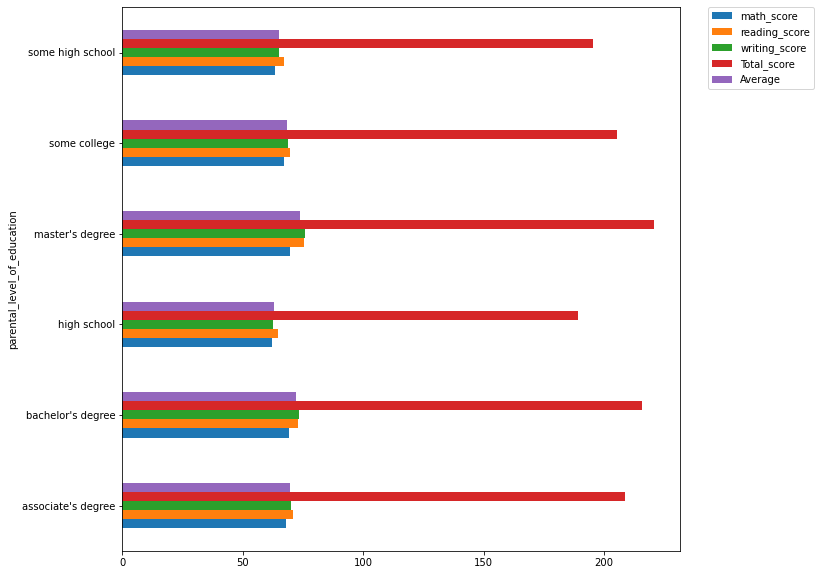

In [42]:
data.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [43]:
#insight
# The students whose parental level of education is master's degree and bachelor's degree have highest total score

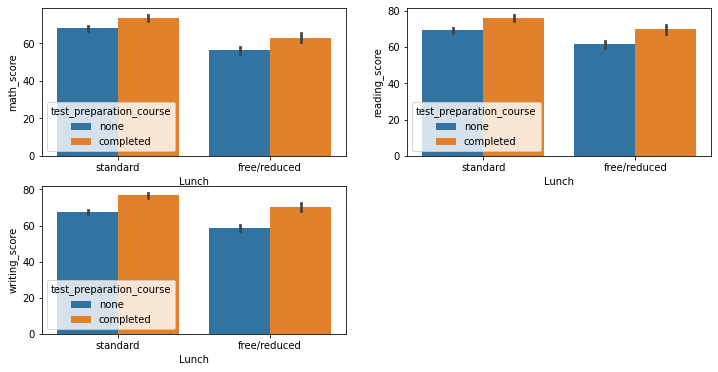

In [44]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data['Lunch'], y=data['math_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data['Lunch'], y=data['reading_score'], hue=data['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data['Lunch'], y=data['writing_score'], hue=data['test_preparation_course'])
plt.show()

In [45]:
# insight 
# students who completed test_preparation_course and gave standard lunch performed well in math reading and writing 

## Outlier detection

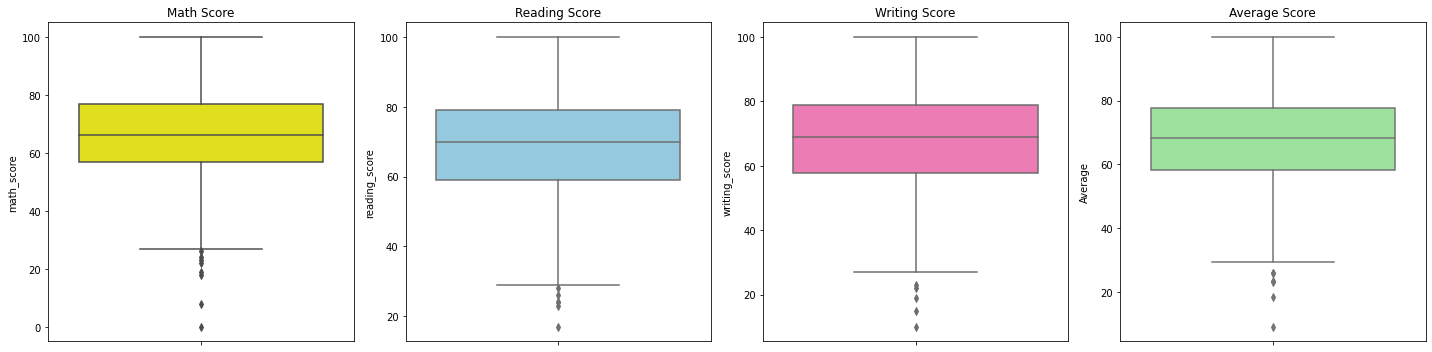

In [248]:
plt.subplots(1, 4, figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=data['math_score'], color='yellow')
plt.title('Math Score')

plt.subplot(1, 4, 2)
sns.boxplot(y=data['reading_score'], color='skyblue')
plt.title('Reading Score')

plt.subplot(1, 4, 3)
sns.boxplot(y=data['writing_score'], color='hotpink')
plt.title('Writing Score')

plt.subplot(1, 4, 4)
sns.boxplot(y=data['Average'], color='lightgreen')
plt.title('Average Score')

plt.tight_layout()
plt.show()


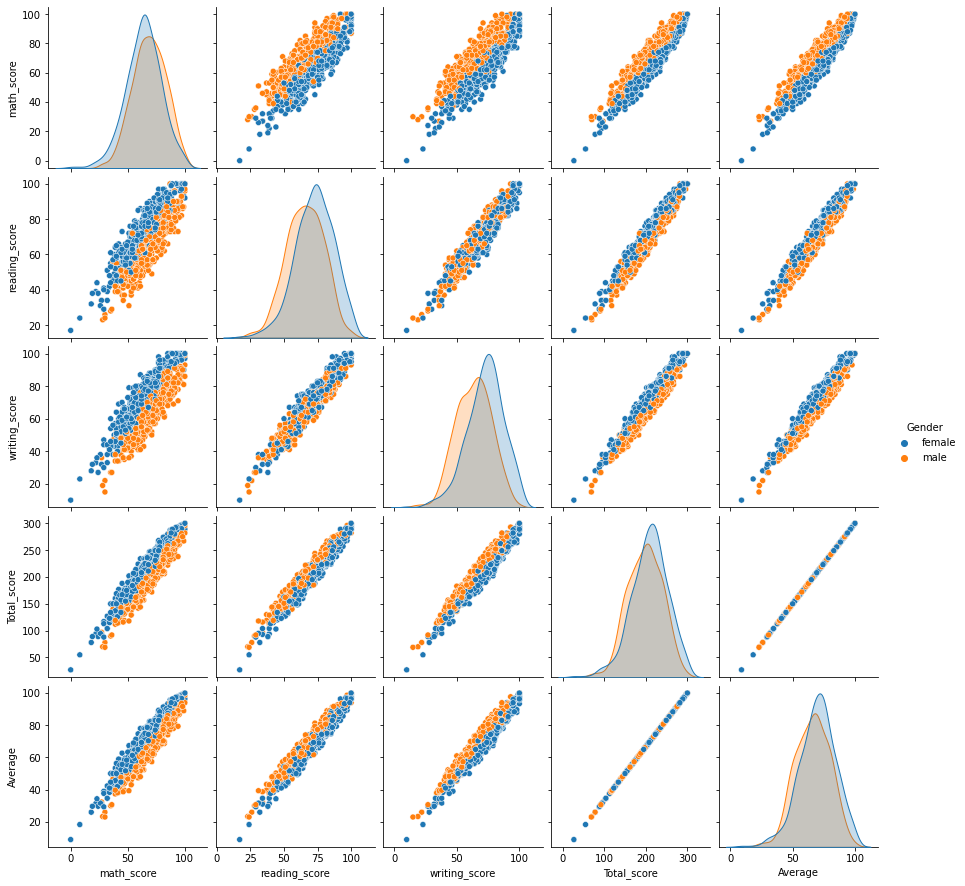

In [47]:
sns.pairplot(data,hue = 'Gender')
plt.show()

In [48]:
#insight
# ALl the scores increse linearly with each other

## Final insights

The students whose parental level of education is master's degree and bachelor's degree have highest total score

Finishing prepartion course and having standard luch is benificial

Female students have top scores

More students performed well in reading and writing only few students performed well in math

# 5) Model building

## Importing libraries for model

In [75]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from catboost import CatBoostRegressor

In [50]:
data.head()

,Gender,race_ethnicity,parental_level_of_education,Lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
data1=data.drop(['Average','Total_score'],axis=1)
#data.drop('Total_score',axis=1)

In [52]:
data1.columns

Index(['Gender', 'race_ethnicity', 'parental_level_of_education', 'Lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [111]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   Lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [218]:
x=data1.drop(['writing_score'],axis=1)

In [219]:
y=data1.drop(['Gender', 'race_ethnicity', 'parental_level_of_education', 'Lunch',
             'test_preparation_course','math_score','reading_score'],axis=1)
#y=data1['math_score','reading_score']

In [220]:
x.head()

,Gender,race_ethnicity,parental_level_of_education,Lunch,test_preparation_course,math_score,reading_score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [221]:
y.head()

,writing_score
0,74
1,88
2,93
3,44
4,75


In [222]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

In [223]:
print(num_features)
print(cat_features)

Index(['math_score', 'reading_score'], dtype='object')
Index(['Gender', 'race_ethnicity', 'parental_level_of_education', 'Lunch',
       'test_preparation_course'],
      dtype='object')


In [224]:
numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

In [225]:
processor=ColumnTransformer([
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features),
])

In [226]:
X=processor.fit_transform(x)

In [227]:
X.shape

(1000, 19)

In [228]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [229]:
x_train.shape,x_test.shape

((700, 19), (300, 19))

In [230]:
# creating a evalute function to give all metrics after model training 
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))  
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [231]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    #'CatBoost Regressor': CatBoostRegressor(verbose=False),
    'AdaBoost Regressor': AdaBoostRegressor()
}

model_list = []
r2_list = []

# Loop through all models
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)

    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Evaluate performance
    model_train_mae, model_train_rmse, model_train_r2,= evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2, = evaluate_model(y_test, y_test_pred)

    # Append model name and test R2 to lists
    model_list.append(model_name)
    r2_list.append(model_test_r2)

    # Print performance
    print(model_name)
    print('Model performance on Training set:')
    print(f'- RMSE: {model_train_rmse:.4f}')
    print(f'- MAE: {model_train_mae:.4f}')
    print(f'- R2: {model_train_r2:.4f}')
     
    print('------------------------------')
    
    print('Model performance on Test set:')
    print(f'- RMSE: {model_test_rmse:.4f}')
    print(f'- MAE: {model_test_mae:.4f}')
    print(f'- R2: {model_test_r2:.4f}')
    print('=' * 40)
    print()


Linear Regression
Model performance on Training set:
- RMSE: 3.3698
- MAE: 2.6959
- R2: 0.9477
------------------------------
Model performance on Test set:
- RMSE: 3.7356
- MAE: 3.0789
- R2: 0.9462

Lasso
Model performance on Training set:
- RMSE: 4.5429
- MAE: 3.6866
- R2: 0.9049
------------------------------
Model performance on Test set:
- RMSE: 4.8162
- MAE: 3.8085
- R2: 0.9105

K-Neighbors Regressor
Model performance on Training set:
- RMSE: 4.0807
- MAE: 3.3071
- R2: 0.9233
------------------------------
Model performance on Test set:
- RMSE: 5.3140
- MAE: 4.0767
- R2: 0.8911

Decision Tree
Model performance on Training set:
- RMSE: 0.2646
- MAE: 0.0229
- R2: 0.9997
------------------------------
Model performance on Test set:
- RMSE: 6.3833
- MAE: 5.0200
- R2: 0.8428

Random Forest Regressor
Model performance on Training set:
- RMSE: 1.5158
- MAE: 1.2221
- R2: 0.9894
------------------------------
Model performance on Test set:
- RMSE: 4.7460
- MAE: 3.7165
- R2: 0.9131

XGB Re

In [232]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.946170
5,XGB Regressor,0.914507
4,Random Forest Regressor,0.913116
1,Lasso,0.910526
6,AdaBoost Regressor,0.900939
2,K-Neighbors Regressor,0.891071
3,Decision Tree,0.842824


In [233]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.62


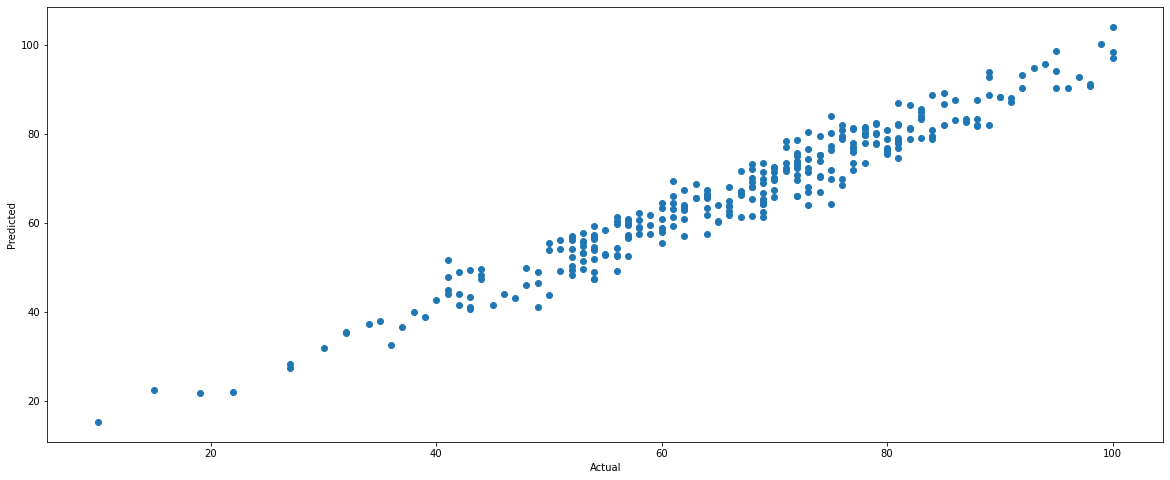

In [243]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

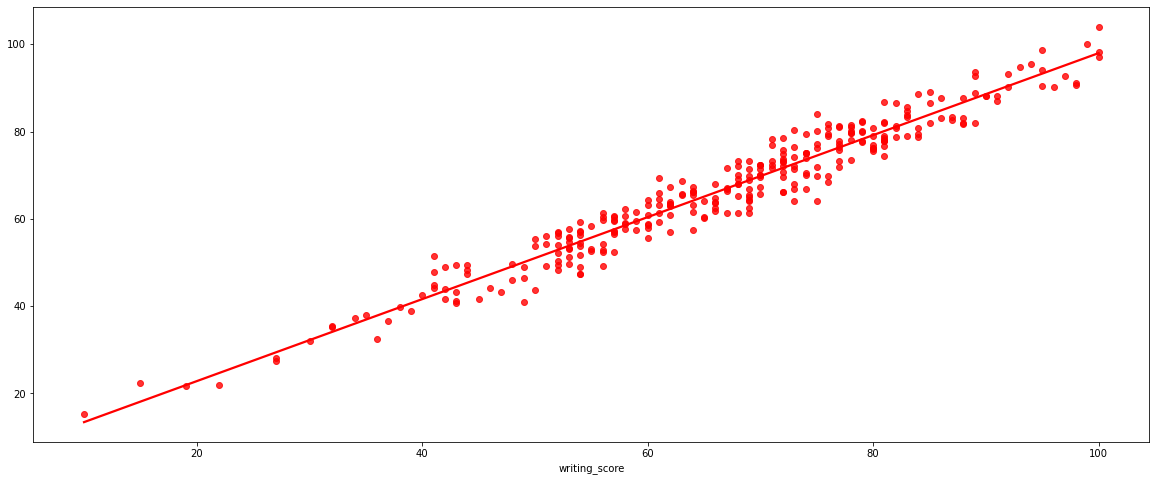

In [246]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')
plt.show()

In [247]:
pred_df = pd.DataFrame({
    'Actual Value': y_test.values.ravel(),
    'Predicted Value': y_pred.ravel(),
    'Difference': y_test.values.ravel() - y_pred.ravel()
})
pred_df

,Actual Value,Predicted Value,Difference
0,84,88.679688,-4.679688
1,73,66.945312,6.054688
2,72,73.328125,-1.328125
3,73,71.484375,1.515625
4,78,79.742188,-1.742188
...,...,...,...
295,85,86.539062,-1.539062
296,58,62.226562,-4.226562
297,53,54.656250,-1.656250
298,39,38.757812,0.242188
